In [1]:
import pickle
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
from wordcloud import WordCloud,STOPWORDS

In [2]:
df=pd.read_csv('spam or ham',sep='\t',names=['label','message'])

In [3]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.shape

(5572, 2)

### lets see no of spam messages in dataset

In [5]:
df[df['label']=='spam'].shape

(747, 2)

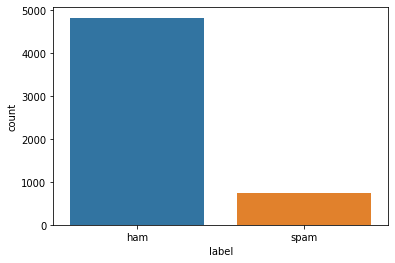

In [6]:
sns.countplot(x='label',data=df)

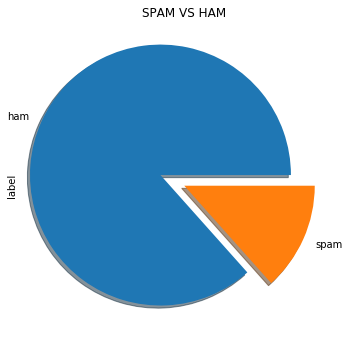

In [7]:
df['label'].value_counts().plot(kind='pie',explode=(0.2,0),shadow=True,figsize=(10,6))
plt.title('SPAM VS HAM')
plt.show()

### Most frequent Spam words

In [8]:
spam_words=''

In [9]:
for j in range(len(df)):
    
    if df['label'][j]=='spam':
        
        val=str(df['message'][j])
        
        tokens = val.split()
        
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        spam_words += " ".join(tokens)+" "

In [10]:
spam_words 

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030 six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info urgent! you have won a 1 week free membership in our £100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub: to use your credit, click the wap link in the next txt message o

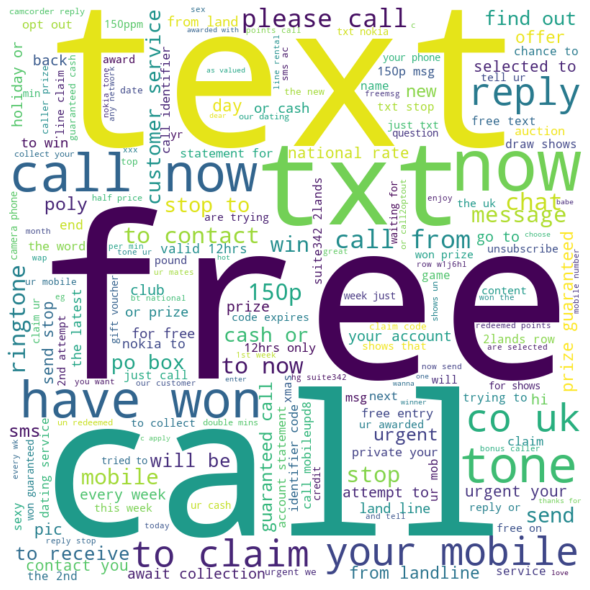

In [11]:
plt.figure(figsize=(10,8))
wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(spam_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### As we can see ['call','text','free','coustmer service','to claim','have won'] these words are most frequent spam words

In [12]:
ham_words=''

In [13]:
for j in range(len(df)):
    
    if df['label'][j]=='ham':
        
        val=str(df['message'][j])
        
        tokens = val.split()
        
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        ham_words += " ".join(tokens)+" "

In [14]:
ham_words

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... u dun say so early hor... u c already then say... nah i don\'t think he goes to usf, he lives around here though even my brother is not like to speak with me. they treat me like aids patent. as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press *9 to copy your friends callertune i\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? i\'ve cried enough today. i\'ve been searching for the right words to thank you for this breather. i promise i wont take your help for granted and will fulfil my promise. you have been wonderful and a blessing at all times. i have a date on sunday with will!! oh k...i\'m watching here:) eh u remember how 2 spell his name... yes i did. he v naughty make until i v wet. fine if that\x92s the way u feel. that\x92s th

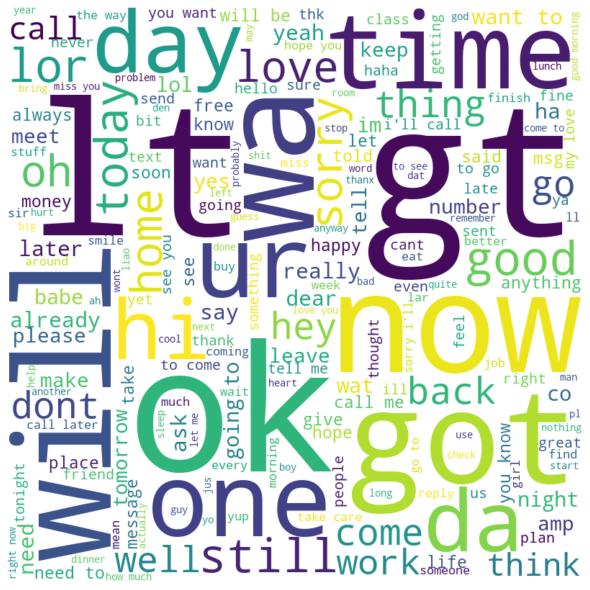

In [15]:
plt.figure(figsize=(10,8))
wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=set(STOPWORDS),min_font_size=10).generate(ham_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
ps=PorterStemmer()

In [17]:
j=[]

In [18]:
for i in range(len(df)):
    msg=re.sub('[^a-zA-Z]',' ',df['message'][i])
    msg=msg.lower()
    msg=msg.split()
    msg=[ps.stem(word) for word in msg if word not in (stopwords.words('english'))]
    msg=' '.join(msg)
    j.append(msg)

In [19]:
j

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [20]:
cv=CountVectorizer()

In [21]:
a=cv.fit_transform(j).toarray()

In [22]:
a.shape

(5572, 6296)

### AS you can see i have 6296 columns in which most of the word just comes once thats why i dont need all of this columns so i select most frequent 4500 columns

In [23]:
cv1=CountVectorizer(max_features=4500)

In [24]:
x=cv1.fit_transform(j).toarray()

In [25]:
x.shape

(5572, 4500)

In [26]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [28]:
#y=pd.get_dummies(df['label'],drop_first=True).values
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [20]:
pickle.dump(cv1,open('count_vectorizer_pickle.pkl','wb'))

In [29]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [31]:
model=MultinomialNB().fit(X_train,y_train)

In [32]:
pred=model.predict(X_test)

In [33]:
cm=confusion_matrix(y_test,pred)

In [34]:
cm

array([[959,  11],
       [  5, 140]], dtype=int64)

In [35]:
acc=accuracy_score(y_test,pred)

In [36]:
acc

0.9856502242152466

In [29]:
pickle.dump(model,open('final_model.pkl','wb'))